In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('Chocolate Sales.csv')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
...,...,...,...,...,...,...
3277,Karlen McCaffrey,Australia,Spicy Special Slims,17/05/2024,"$5,303.58",354
3278,Jehu Rudeforth,USA,White Choc,07/06/2024,"$7,339.32",121
3279,Ches Bonnell,Canada,Organic Choco Syrup,26/07/2024,$616.09,238
3280,Dotty Strutley,India,Eclairs,28/07/2024,"$2,504.62",397


In [50]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [51]:
df.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
3277,Karlen McCaffrey,Australia,Spicy Special Slims,17/05/2024,"$5,303.58",354
3278,Jehu Rudeforth,USA,White Choc,07/06/2024,"$7,339.32",121
3279,Ches Bonnell,Canada,Organic Choco Syrup,26/07/2024,$616.09,238
3280,Dotty Strutley,India,Eclairs,28/07/2024,"$2,504.62",397
3281,Karlen McCaffrey,India,70% Dark Bites,23/05/2024,"$5,915.87",355


In [52]:
df.shape

(3282, 6)

In [53]:
df.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

In [54]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [55]:
df.describe()

,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


In [56]:
df['Amount'] = df['Amount'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [57]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


<Figure size 432x288 with 0 Axes>

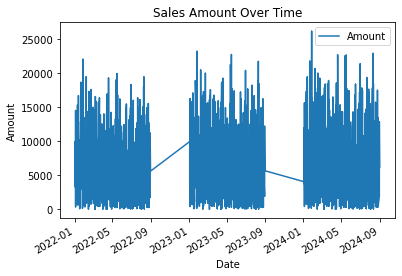

Line Plot: Shows trend of sales amount over time.


In [58]:
# 1. Line Plot - Sales Over Time
plt.figure()
df.sort_values('Date').plot(x='Date', y='Amount')
plt.title("Sales Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.show()
print("Line Plot: Shows trend of sales amount over time.")

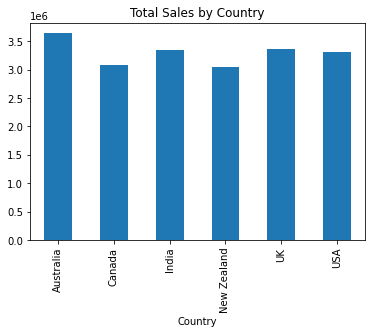

Bar Chart: Compares total sales among countries.


In [59]:
# 2. Bar Chart - Total Sales by Country
plt.figure()
df.groupby('Country')['Amount'].sum().plot(kind='bar')
plt.title("Total Sales by Country")
plt.show()
print("Bar Chart: Compares total sales among countries.")

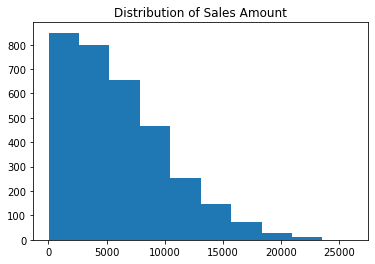

Histogram: Shows distribution of sales amounts.


In [60]:
# 3. Histogram - Distribution of Amount
plt.figure()
plt.hist(df['Amount'], bins=10)
plt.title("Distribution of Sales Amount")
plt.show()
print("Histogram: Shows distribution of sales amounts.")

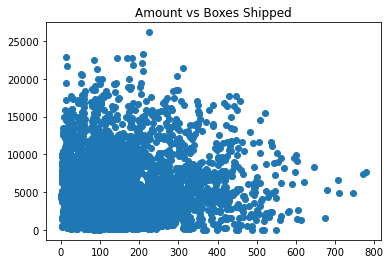

Scatter Plot: Shows relationship between boxes shipped and amount.


In [61]:
# 4. Scatter Plot - Amount vs Boxes
plt.figure()
plt.scatter(df['Boxes Shipped'], df['Amount'])
plt.title("Amount vs Boxes Shipped")
plt.show()
print("Scatter Plot: Shows relationship between boxes shipped and amount.")


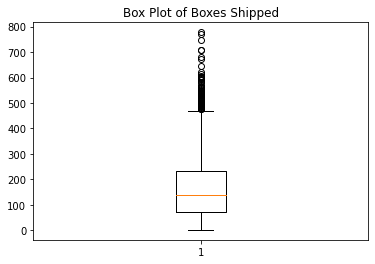

Box Plot: Displays spread and outliers.


In [62]:
# 5. Box Plot - Boxes Shipped
plt.figure()
plt.boxplot(df['Boxes Shipped'])
plt.title("Box Plot of Boxes Shipped")
plt.show()
print("Box Plot: Displays spread and outliers.")


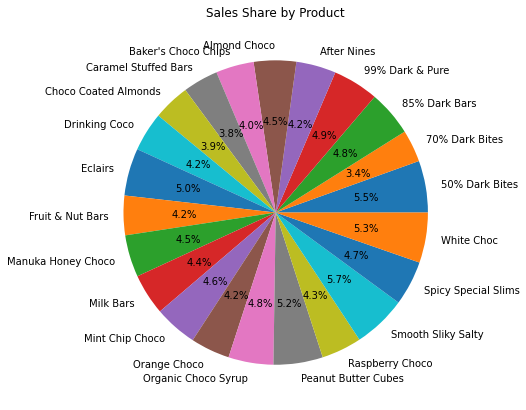

Pie Chart: Shows product contribution percentage.


In [63]:
# 6. Pie Chart - Sales by Product
plt.figure(figsize=(7, 7))
df.groupby('Product')['Amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Share by Product")
plt.ylabel("")
plt.show()
print("Pie Chart: Shows product contribution percentage.")

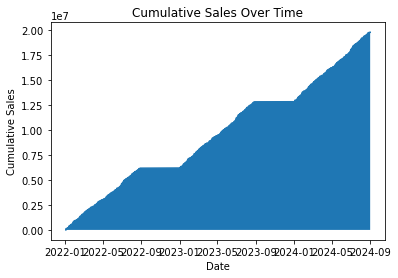

Area Plot: Shows cumulative sales growth over time.


In [64]:
# 7. Area Plot - Cumulative Sales
plt.figure()

df_sorted = df.sort_values('Date')
df_sorted['Cumulative Sales'] = df_sorted['Amount'].cumsum()


x = df_sorted['Date'].to_numpy()
y = df_sorted['Cumulative Sales'].to_numpy()

plt.plot(x, y)
plt.fill_between(x, y)

plt.title("Cumulative Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Sales")
plt.show()

print("Area Plot: Shows cumulative sales growth over time.")

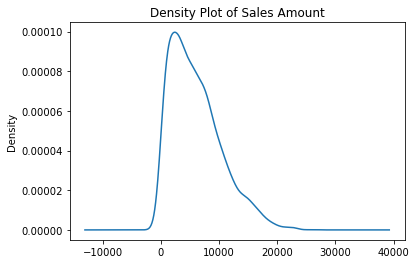

Density Plot: Shows smooth distribution curve.


In [65]:
# 8. Density Plot
plt.figure()
df['Amount'].plot(kind='density')
plt.title("Density Plot of Sales Amount")
plt.show()
print("Density Plot: Shows smooth distribution curve.")

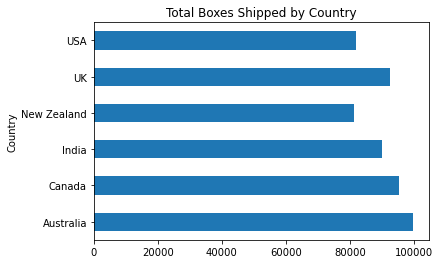

Horizontal Bar Chart: Compares shipment quantities.


In [66]:
# 9. Horizontal Bar Chart
plt.figure()
df.groupby('Country')['Boxes Shipped'].sum().plot(kind='barh')
plt.title("Total Boxes Shipped by Country")
plt.show()
print("Horizontal Bar Chart: Compares shipment quantities.")

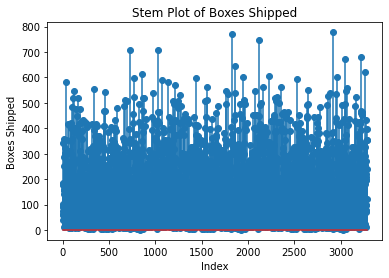

Stem Plot: Shows discrete distribution of shipped boxes.


In [67]:
# 10. Stem Plot
plt.figure()
y = df['Boxes Shipped'].to_numpy()  
x = np.arange(len(y))                
plt.stem(x, y)
plt.title("Stem Plot of Boxes Shipped")
plt.xlabel("Index")
plt.ylabel("Boxes Shipped")
plt.show()

print("Stem Plot: Shows discrete distribution of shipped boxes.")

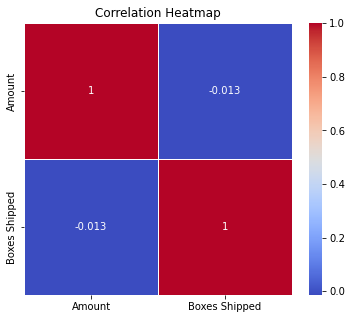

Heatmap: Shows correlation strength between numerical variables. Values close to 1 or -1 indicate strong relationship.


In [69]:
#11. Heatmap Plot

numeric_df = df[['Amount', 'Boxes Shipped']]

corr = numeric_df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

print("Heatmap: Shows correlation strength between numerical variables. Values close to 1 or -1 indicate strong relationship.")

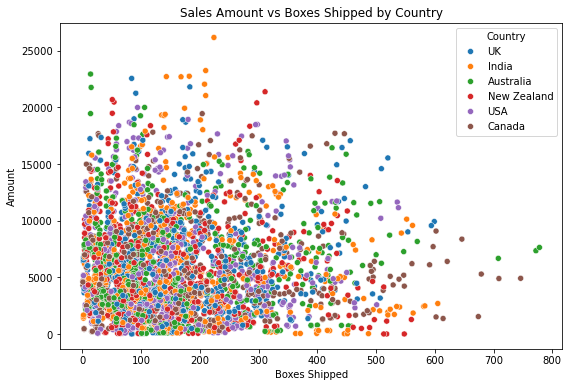

Scatter Plot: Shows how relationship varies across different countries.


In [73]:
#12. Scatter Plot

plt.figure(figsize=(9,6))

sns.scatterplot(
    x='Boxes Shipped',
    y='Amount',
    hue='Country',
    data=df
)

plt.title("Sales Amount vs Boxes Shipped by Country")
plt.show()

print("Scatter Plot: Shows how relationship varies across different countries.")

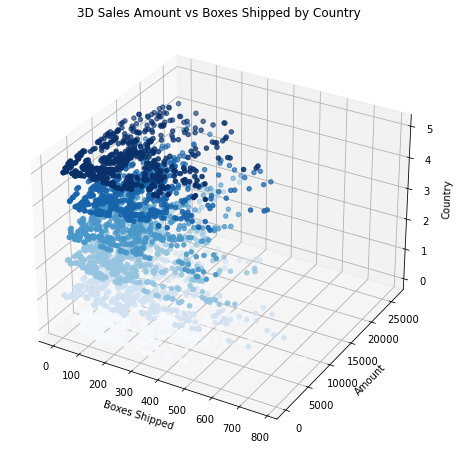

3D Scatter Plot: Shows relationship between Boxes Shipped, Amount, and Country.


In [77]:
#13. 3D Scatter Plot

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

# Convert Country to numeric codes 
df['Country_Code'] = df['Country'].astype('category').cat.codes

scatter = ax.scatter(
    df['Boxes Shipped'],
    df['Amount'],
    df['Country_Code'],
    c=df['Country_Code']
)

ax.set_xlabel("Boxes Shipped")
ax.set_ylabel("Amount")
ax.set_zlabel("Country")
ax.set_title("3D Sales Amount vs Boxes Shipped by Country")

plt.show()

print("3D Scatter Plot: Shows relationship between Boxes Shipped, Amount, and Country.")

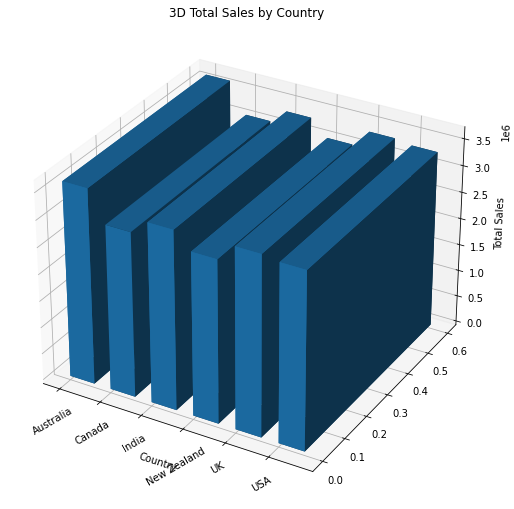

In [84]:
#14. 3D - Bar Chart - Total Sales by Country
country_sales = df.groupby('Country')['Amount'].sum()

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(country_sales))
y_pos = np.zeros(len(country_sales))
z_pos = np.zeros(len(country_sales))

dx = np.ones(len(country_sales)) * 0.6
dy = np.ones(len(country_sales)) * 0.6
dz = country_sales.values

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz)

ax.set_xticks(x_pos)
ax.set_xticklabels(country_sales.index, rotation=30)
ax.set_xlabel('Country')
ax.set_zlabel('Total Sales')
ax.set_title("3D Total Sales by Country")

plt.subplots_adjust(bottom=0.25)   
plt.show()

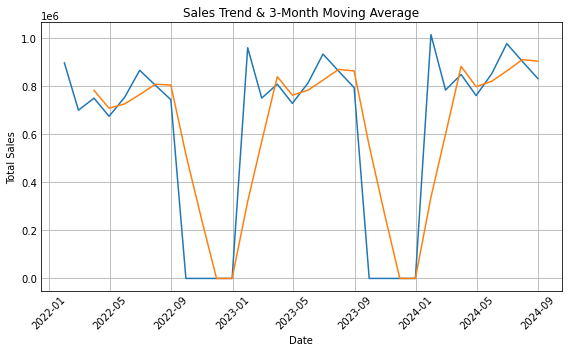

This graph shows the monthly total sales trend and a 3-month moving average.


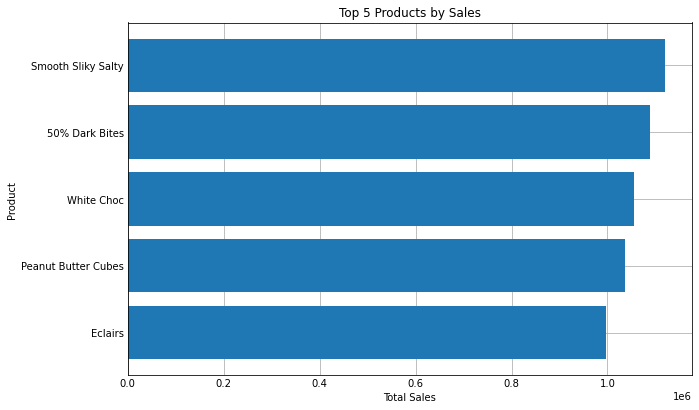

This horizontal bar chart ranks the top 5 products based on total sales, helping identify best-performing products.


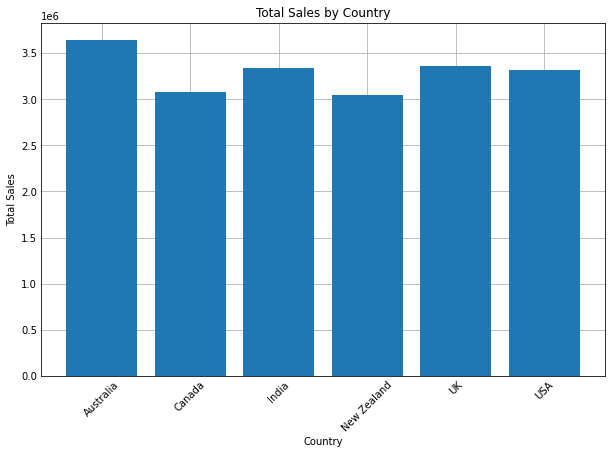

This bar chart compares total sales across countries to understand regional performance.


In [81]:
df['Date'] = pd.to_datetime(df['Date'])

# 1. Sales Trend + 3-Month Moving Average
monthly_sales = (
    df.groupby(pd.Grouper(key='Date', freq='ME'))['Amount']
    .sum()
    .reset_index()
)

monthly_sales['3M_MA'] = monthly_sales['Amount'].rolling(window=3).mean()

plt.figure(figsize=(8,5))
plt.plot(monthly_sales['Date'].values, monthly_sales['Amount'].values)
plt.plot(monthly_sales['Date'].values, monthly_sales['3M_MA'].values)

plt.title("Sales Trend & 3-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("This graph shows the monthly total sales trend and a 3-month moving average.")

# 2. Top 5 Products by Sales (Horizontal Bar Chart)

top5_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5)

fig = plt.figure(figsize=(8,5))
plt.barh(top5_products.index, top5_products.values)
plt.title("Top 5 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.show()

print("This horizontal bar chart ranks the top 5 products based on total sales, helping identify best-performing products.")

# 3. Total Sales by Country (Bar Chart)

country_sales = df.groupby('Country')['Amount'].sum()

fig = plt.figure(figsize=(8,5))
plt.bar(country_sales.index, country_sales.values)
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

print("This bar chart compares total sales across countries to understand regional performance.")
